<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#明确目的" data-toc-modified-id="明确目的-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>明确目的</a></span></li><li><span><a href="#观察各项主要特征值与房屋售价的关系" data-toc-modified-id="观察各项主要特征值与房屋售价的关系-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>观察各项主要特征值与房屋售价的关系</a></span><ul class="toc-item"><li><span><a href="#分析'Saleprice'" data-toc-modified-id="分析'Saleprice'-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>分析'Saleprice'</a></span></li><li><span><a href="#分析特征数据" data-toc-modified-id="分析特征数据-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>分析特征数据</a></span><ul class="toc-item"><li><span><a href="#数据再分类" data-toc-modified-id="数据再分类-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>数据再分类</a></span></li><li><span><a href="#提取主要特征值" data-toc-modified-id="提取主要特征值-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>提取主要特征值</a></span></li><li><span><a href="#验证主要特征值" data-toc-modified-id="验证主要特征值-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>验证主要特征值</a></span><ul class="toc-item"><li><span><a href="#类别类型特征值" data-toc-modified-id="类别类型特征值-2.2.3.1"><span class="toc-item-num">2.2.3.1&nbsp;&nbsp;</span>类别类型特征值</a></span></li><li><span><a href="#数值型特征" data-toc-modified-id="数值型特征-2.2.3.2"><span class="toc-item-num">2.2.3.2&nbsp;&nbsp;</span>数值型特征</a></span></li></ul></li><li><span><a href="#更加科学分析数据" data-toc-modified-id="更加科学分析数据-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>更加科学分析数据</a></span><ul class="toc-item"><li><span><a href="#关系矩阵" data-toc-modified-id="关系矩阵-2.2.4.1"><span class="toc-item-num">2.2.4.1&nbsp;&nbsp;</span>关系矩阵</a></span></li><li><span><a href="#房价关系矩阵" data-toc-modified-id="房价关系矩阵-2.2.4.2"><span class="toc-item-num">2.2.4.2&nbsp;&nbsp;</span>房价关系矩阵</a></span></li><li><span><a href="#关系点图" data-toc-modified-id="关系点图-2.2.4.3"><span class="toc-item-num">2.2.4.3&nbsp;&nbsp;</span>关系点图</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#模拟数据" data-toc-modified-id="模拟数据-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>模拟数据</a></span></li><li><span><a href="#检查测试数据集" data-toc-modified-id="检查测试数据集-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>检查测试数据集</a></span></li></ul></div>

# 明确目的
本次练习的目的：  
**1.理解问题**：观察每个变量特征的意义以及对于问题的重要程度  
**2.研究主要特征**：最终变量y=房价  
**3.研究其他变量**：研究其他变量对于‘房价’的影响  
**4.基础数据清理**：对缺失的数据异常点和分类数据进行处理  
**5.测试假设**

In [5]:
# 导入模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# 为了在jupyter notebook作图需要用到这个命令


In [8]:
data_train = pd.read_csv("F:/python/kaggle/input/home-data-for-ml-course/train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 观察各项主要特征值与房屋售价的关系
为了能够更好判断各项特征值，我们需要花一定的时间对数据进行研究和处理。

## 分析'Saleprice'

In [7]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

通过上面我们得知''SalePrice'没有无效或者其他非数值的数据，下面通过图示继续研究SalePrice

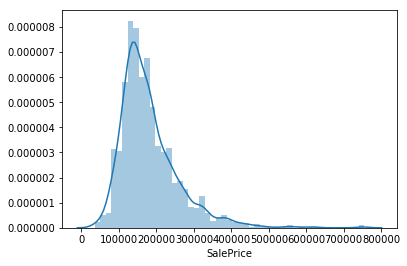

In [10]:
sns.distplot(data_train['SalePrice'])  
# 直方图

可以看到与使用matplotlib作的直方图的最大区别在于有一条密度曲线（KDE），可以通过设置参数去掉这条默认曲线。  
另外由上图可知房价呈现**正态**分布。下面还可以看到统计学两个概念：**峰度（Kurtosis）&偏度（Skewness）** 
>**Kurtosis(峰度):是描述变量所有取值分布形态陡峭缓慢程度的统计量。**他是和正态分布比较的。
1. Kurtosis=0  与正态分布陡峭程度相同
2. kurtosis>0  比正态分布的高峰更加陡峭——尖顶峰
3. kurtosis<0  比正态分布的高峰更加平缓——平顶峰  
计算公式：  $$\beta=M_4/\theta^4$$  

>**偏度（skewness）:偏度是描述某个变量取值分布对称性的统计量**
1. skewness=0 与正态分布偏度想听
2. skewness>0 正偏差数值较大，为正偏或者右偏。长尾巴拖在右边。
3. skewness<0 负偏差数值较大，为负或者左偏。长尾巴拖在左边。
计算公式： $$S=(X^-{M_0})/\theta$$ skewness越大，分布形态偏移程度越大

In [11]:
# skewness and kurtosis
print("skewness: %f" % data_train['SalePrice'].skew())
print("kurtosis : %f"% data_train['SalePrice'].kurt())

skewness: 1.882876
kurtosis : 6.536282


通过以上的计算，理论结合图形我们可以看到，长尾巴拖在右边，且高峰陡峭

## 分析特征数据

### 数据再分类
为了让我们对数据的分析更加科学性，我们可以新建一个excel,具体需要记录的数据如下。  
1. variable: 变量名  
2. Data Type: 各变量的数据类型，分为数值型-0， 类型别--1  
3. Segment: 变量的类型。分为“Building--0”、"Space--1"、"location--2"具体解释如下：    
    3.1 Building: 比如房租材料，造型等与房租物理特性相关的特征(eg. 'OverallQual')  
    3.2 Space: 与房间空间特征相关的特征,如面积(e.g. 'TotalBsmtSF')  
    3.3 Location: 如地段，道路等情况(e.g. 'Neighborhood')  
4. Expectation: 表示我们认为该变量对于'SalePrice'的影响程度“high-3”,"Medium-2","low--1"
5. Conclusion: 与“Expectation”类似，结论
6. Comments: 其他关于该变量的一些看法

### 提取主要特征值
已完成  
进一步分析  
1. Utilities：公共设施越齐全越贵
2. LotArea: 当然地皮面积
3. Neighborhood：地理位置，市中心当然贵
4. OverallQual: 对房子的整体材料和装修评估
5. YearBuild：建造年份  
6. TotalBsmtSF&GrLivArea: 训练数据中有很多特征涉及了面积，所以没必要全部考虑，为了简化，选择了TotalBsmtSF&GrLivArea  
7. Heating: 供暖很重要，但是数据基本都是GasA类型，所以不考虑
8. CenteralAir：中央空调可以考虑下
9. MiscVal： 可以考虑
10. GarageCars & GarageAre: 车库可容纳车辆数以及面积，这个可以算成单位车辆用油的面积来计算  

Variable|segment|Data Type|Comments
:---:|:---:|:---:|:---:|
LotArea|1|0|地皮面积|
GrLivAre|1|0|生活面积|
TotalBsmtSf|1|0|地下室总面积|
Miscval|0|0|其他资产|
GarageAre/GarageCars|1|0|车库|
YearBuilt|0|1||
CenterAir|0|1||
OveralQual|0|1||
Neighborhood|2|1|地段|




### 验证主要特征值

#### 类别类型特征值  


(-0.5, 1.5, 0, 400000)

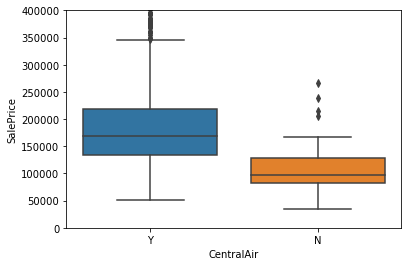

In [15]:
# CentralAir
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=400000)

可以看到明显有中央空调的房价明显更高

(-0.5, 9.5, 0, 800000)

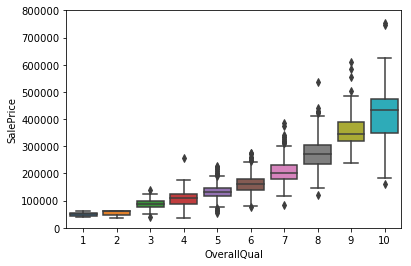

In [17]:
# OverallQual
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 111.5, 0, 800000)

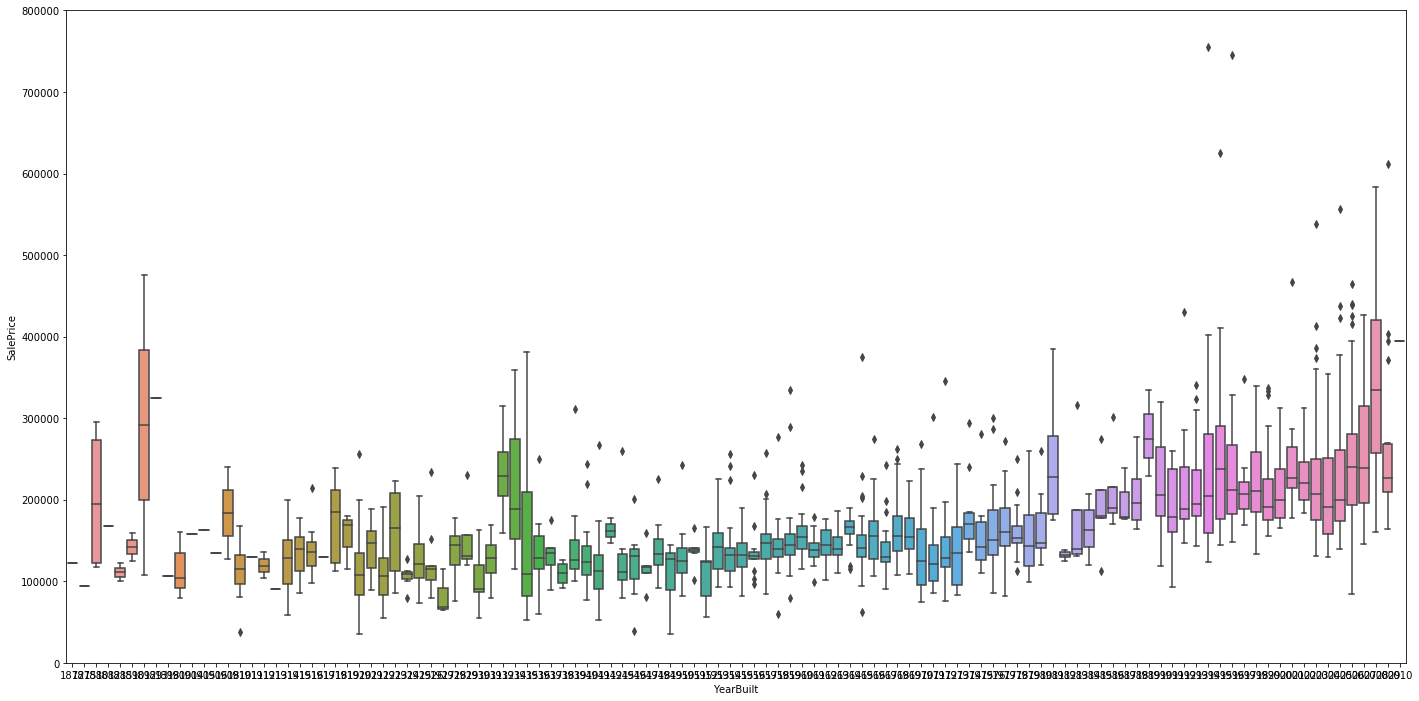

In [25]:
# YearBuilt boxplot
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(24,12))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

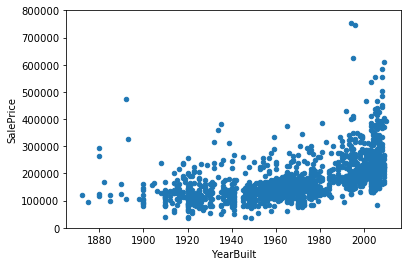

In [30]:
# YearBuilt Scatter
var = 'YearBuilt'
data = pd.concat([data_train["SalePrice"],
                 data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000))

最开始我们用箱形图绘制了房价与建造年份的关系，没有明显的变化，我们又接着用点图来显示，可以很明显看到有线性增长的趋势。

(-0.5, 24.5, 0, 800000)

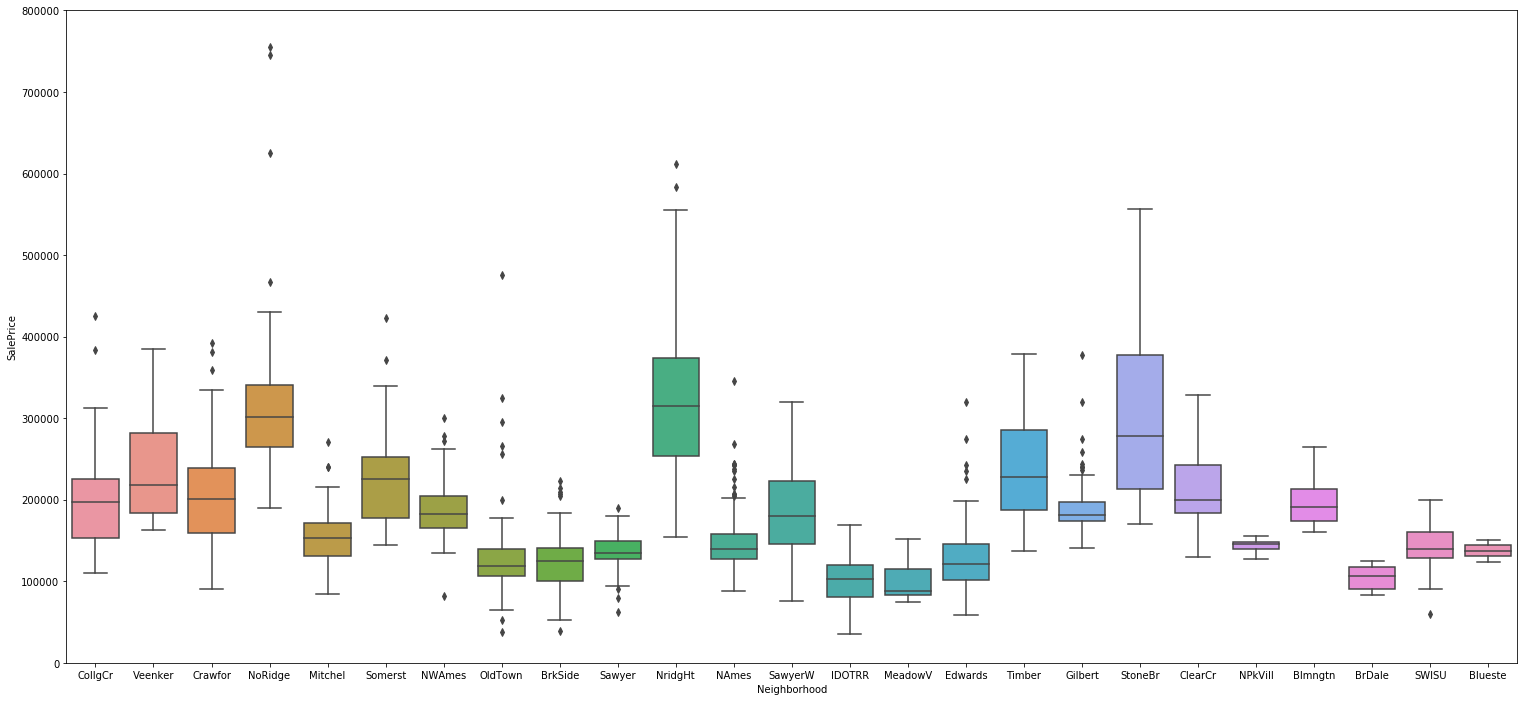

In [32]:
# Neighborhood
var = 'Neighborhood'
data = pd.concat([data_train["SalePrice"], data_train[var]], axis=1)
f, ax = plt. subplots(figsize=(26,12))
fig = sns.boxplot(x=var, y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)

分析待定。。。

In [35]:
location = []
for x in data['Neighborhood']:
    if x not in location:
        location.append(x)
data.sort_values(['Neighborhood','SalePrice'])
nb_data = data
nb_data.head()

,SalePrice,Neighborhood
0,208500,CollgCr
1,181500,Veenker
2,223500,CollgCr
3,140000,Crawfor
4,250000,NoRidge


#### 数值型特征

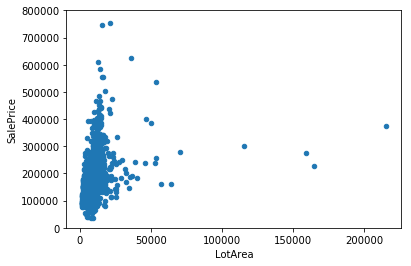

In [37]:
var = 'LotArea'
data = pd.concat([data_train["SalePrice"],data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0,800000))

看起来好像该特征并没有什么差别，所以不予考虑

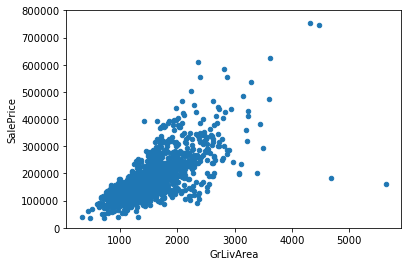

In [40]:
# GrLivAra
var='GrLivArea'
data = pd.concat([data_train["SalePrice"], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0.,800000))

正相关，可以考虑

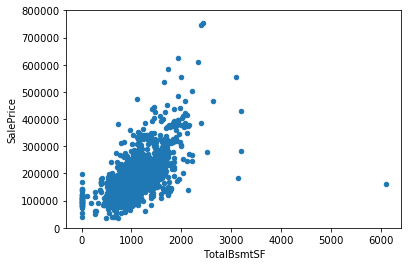

In [41]:
# TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([data_train["SalePrice"],data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

房价与地下室面积呈现正相关可以考虑

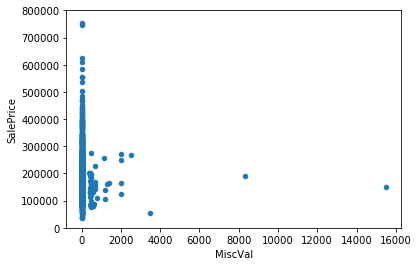

In [42]:
# MiscVal
var = 'MiscVal'
data = pd.concat([data_train["SalePrice"],data_train[var]],axis =1)
data.plot.scatter(x=var , y='SalePrice', ylim=(0,800000))

似乎没什么关系， dropoff

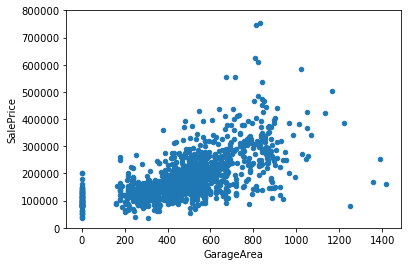

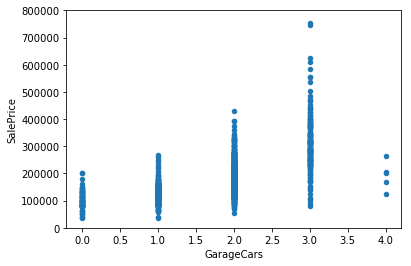

In [43]:
# GarageAre/GarageCars
var = ['GarageArea','GarageCars']
for index in range(2):
    data = pd.concat([data_train["SalePrice"], data_train[var[index]]], axis=1)
    data.plot.scatter(x = var[index], y='SalePrice', ylim=(0,800000))

房价与车库面积呈线性相关

### 更加科学分析数据
上面的分析还是偏于主管，所以多多少少会不放心，会担心自己的特征会不会多了或者少了，或者选了不太合适用的特征。所以要进行更加科学的分析。
为了更加科学分析数据，我们需要做如下工作：
1. 得到各个特征之间的关系矩阵。(correlation matrix)
2. SalePrice的关系矩阵
3. 绘制出最相关的特征的关系图


#### 关系矩阵

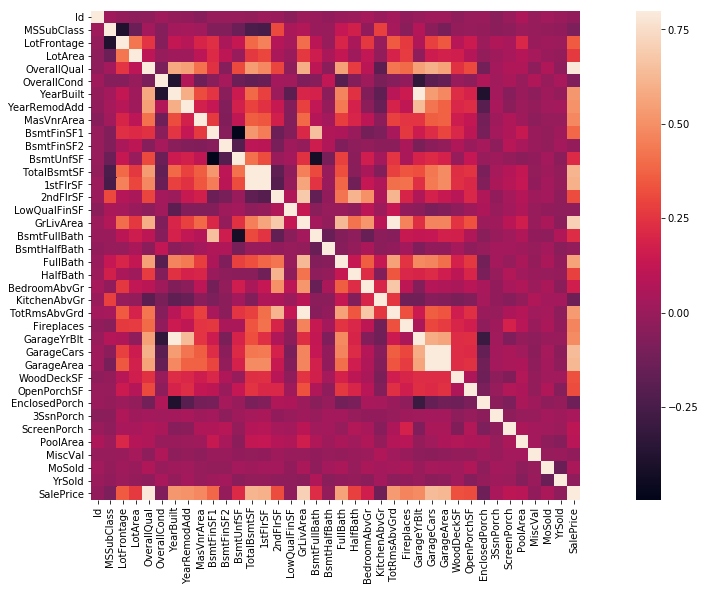

In [44]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

通过比对比较强的相关性的有：
1. OveralQual
2. YearBuilt
3. TotalBsmtSF
4. GrLivArea
5. FullBath
6. TotRmsAbvGrd
7. GarageCars
8. GarageAreas
有以下几点需要注意：
1. 我们上面选取特征值也是通过肉眼判断颜色深浅，所以还不是非常科学。
2. 上面有几个特征值是类似的，例如**garageArea GarageCars**,**TotalBsmtSF 1stFlrSF**怎么取舍看下面分析
3. 最后发现上面的矩阵只是数值型，像离散型的**Neighborhood**没有计算在内，所以下面尝试用sklearn进行处理。

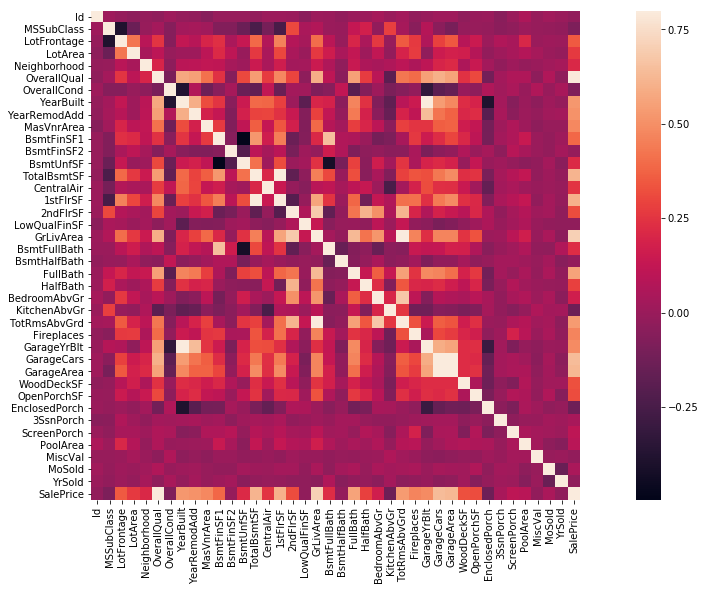

In [46]:
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corrmat = data_train.corr()
f, ax=plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax=0.8, square=True)

可以看出Neighborhood 与CentralAir对房价影响并不大

#### 房价关系矩阵


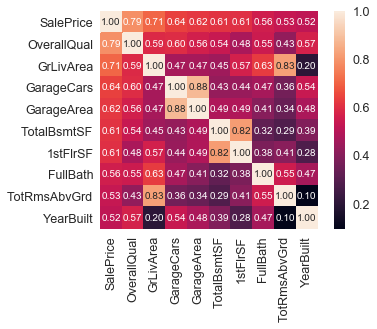

In [50]:
 k =10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,annot=True,\
                square = True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels= cols.values)

舍去 'GarageAreas' ‘1stFlr’

#### 关系点图

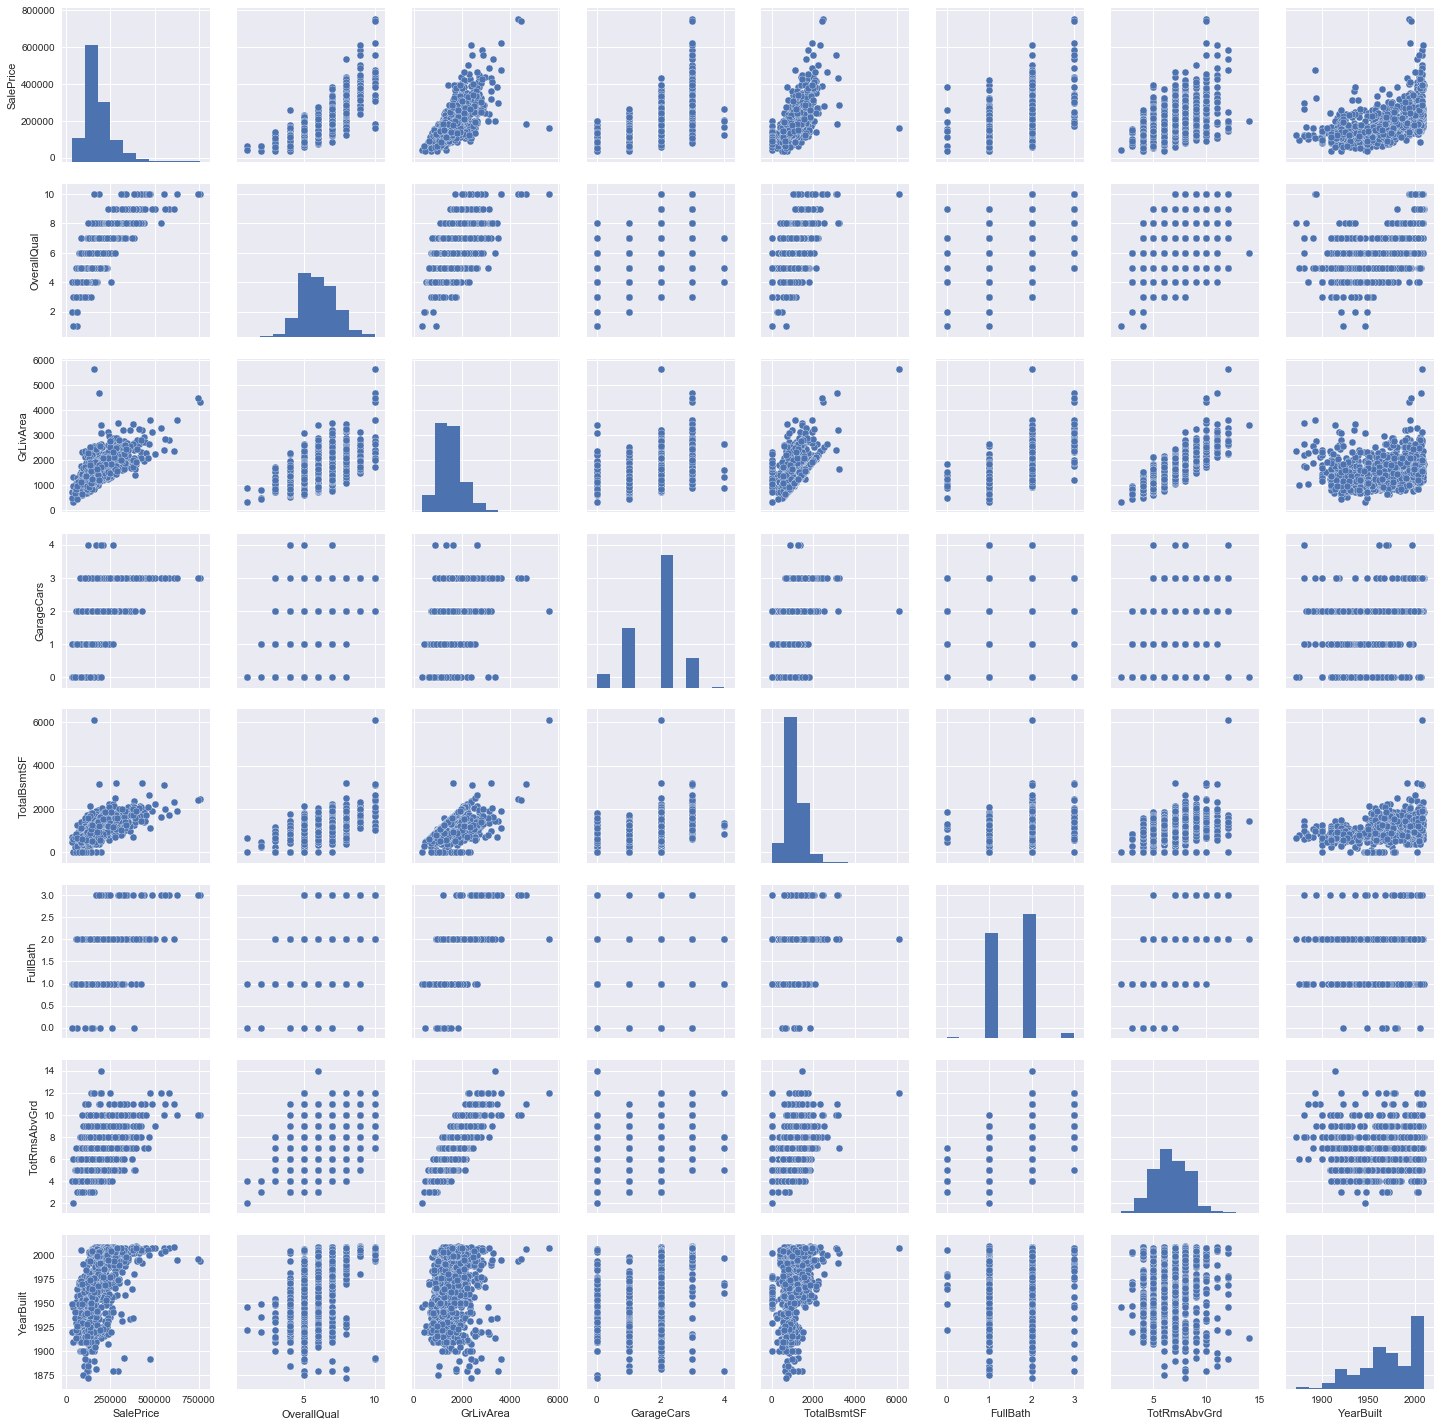

In [52]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(data_train[cols], size=2.5)
plt.show()

# 模拟数据

In [57]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [59]:
# 获取数据
cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
X = data_train[cols].values
y = data_train['SalePrice'].values
X_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.33, random_state=42)

In [65]:
clfs={
    'svm':svm.SVR(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=400),
    'BayesianRidge': linear_model.BayesianRidge() 
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train,y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf+"  Cost:"+str(np.sum(y_pred-y_test)/len(y_pred)))
    except Exception as e:
        print(clf+"Error:")
        print(str(e))

svm  Cost:-17.9673063476
RandomForestRegressor  Cost:-2.1046388008
BayesianRidge  Cost:-17.1915046929


由于上面结果选择森林回归的算法，为了更加直观观察训练结果，显示一下未回归一化数据的预测结果。

In [66]:
cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
X = data_train[cols].values
y = data_train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

# 保存clf, 供下面计算测试集数据使用
# rfr = clf

[ 141237.8125      309787.9425      124752.125       171776.875       309109.68
   78672.25        191213.9475      153771.03         78955.5         112369.125
  162499.92        123429.875        95995.          222988.355       187452.5
  121940.875       193855.625       132267.375       119445.76        197769.1225
  160703.625       221572.38166667  171017.0275      125214.04166667
  187422.475       167011.35        201350.8175       97057.375       187247.
  204909.38        111245.26        234027.8975      180098.8025      110518.25
  258068.8825      140563.25        161842.0525      205184.75        302133.505
  105851.          132583.          232381.375       119428.775       373835.12
  139914.8375      165003.1925      126888.52083333  115789.625       430415.945
  145447.815       119822.16666667  187302.125       126639.85875
  345258.465       144091.57897727  243736.72        195182.125       154841.625
  151576.625       101952.           82293.75        139961.  

In [67]:
sum(abs(y_pred - y_test))/len(y_pred)

19597.008928157153

# 检查测试数据集

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

rfr = clf

In [69]:
data_test = pd.read_csv("F:/python/kaggle/input/home-data-for-ml-course/test.csv")
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

数据缺失值，所以不能直接用predict, 但是缺失值比较少，所以我们填充缺失值为均值。

In [70]:
data_test['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [71]:
data_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [73]:
# fillna函数注意一下
cols2 = ['OverallQual','GrLivArea','FullBath','TotRmsAbvGrd','YearBuilt']
cars = data_test['GarageCars'].fillna(1.766118)
bsmt = data_test['TotalBsmtSF'].fillna(1046.117970)
data_test_X = pd.concat([data_test[cols2], cars, bsmt], axis=1)
data_test_X.isnull().sum()

OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [76]:
X = data_test_X.values
y_te_pred = rfr.predict(X)
print(y_te_pred)
print(y_te_pred.shape)
print(X.shape)

[  92853.875   107655.4425  134946.0525 ...,  100792.8425   93657.885
  173443.6   ]
(1459,)
(1459, 7)


In [77]:
data_test_X

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,YearBuilt,GarageCars,TotalBsmtSF
0,5,896,1,5,1961,1.0,882.0
1,6,1329,1,6,1958,1.0,1329.0
2,5,1629,2,6,1997,2.0,928.0
3,6,1604,2,7,1998,2.0,926.0
4,8,1280,2,5,1992,2.0,1280.0
5,6,1655,2,7,1993,2.0,763.0
6,6,1187,2,6,1992,2.0,1168.0
7,6,1465,2,7,1998,2.0,789.0
8,7,1341,1,5,1990,2.0,1300.0
9,4,882,1,4,1970,2.0,882.0


In [78]:
prediction = pd.DataFrame(y_te_pred, columns=['SalePrice'])
result = pd.concat([data_test['Id'], prediction], axis=1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [79]:
result.to_csv('./Predictions.csv', index=False)